In [1]:
# Importer pandas
import pandas as pd

# Charger le dataset
new_movie_data = pd.read_csv('c:/Users/DELL/Documents/COURS_H3_HITEMA/MachineLearning_2/Projet_Perso/data/movie_statistic_dataset.csv', encoding='ISO-8859-1')

# Convertir la colonne 'production_date' en format datetime
new_movie_data['production_date'] = pd.to_datetime(new_movie_data['production_date'], errors='coerce')

# Séparer les genres et appliquer un encodage OneHot
new_movie_data['genres'] = new_movie_data['genres'].fillna('')  # Remplacer les valeurs manquantes dans 'genres' par une chaîne vide
genres_expanded = new_movie_data['genres'].str.get_dummies(sep=',')

# Fusionner les colonnes encodées avec le dataset original
movie_data_encoded = pd.concat([new_movie_data, genres_expanded], axis=1)

# Vérifier les valeurs manquantes après ces opérations
missing_values_after_processing = movie_data_encoded.isnull().sum()

# Afficher les premières lignes du dataset prétraité et les valeurs manquantes
movie_data_encoded.head(), missing_values_after_processing

(                                   movie_title production_date  \
 0                     Avatar: The Way of Water      2022-12-09   
 1                            Avengers: Endgame      2019-04-23   
 2  Pirates of the Caribbean: On Stranger Tides      2011-05-20   
 3                      Avengers: Age of Ultron      2015-04-22   
 4                       Avengers: Infinity War      2018-04-25   
 
                      genres  runtime_minutes  director_name  \
 0  Action,Adventure,Fantasy            192.0  James Cameron   
 1    Action,Adventure,Drama            181.0              -   
 2  Action,Adventure,Fantasy            137.0   Rob Marshall   
 3   Action,Adventure,Sci-Fi            141.0    Joss Whedon   
 4   Action,Adventure,Sci-Fi            149.0              -   
 
               director_professions director_birthYear director_deathYear  \
 0         writer,producer,director               1954              alive   
 1                                -                  -  

In [ ]:
import sys
print(sys.executable)


In [ ]:
!{sys.executable} -m pip install pandas scikit-learn


In [ ]:
%pip install matplotlib


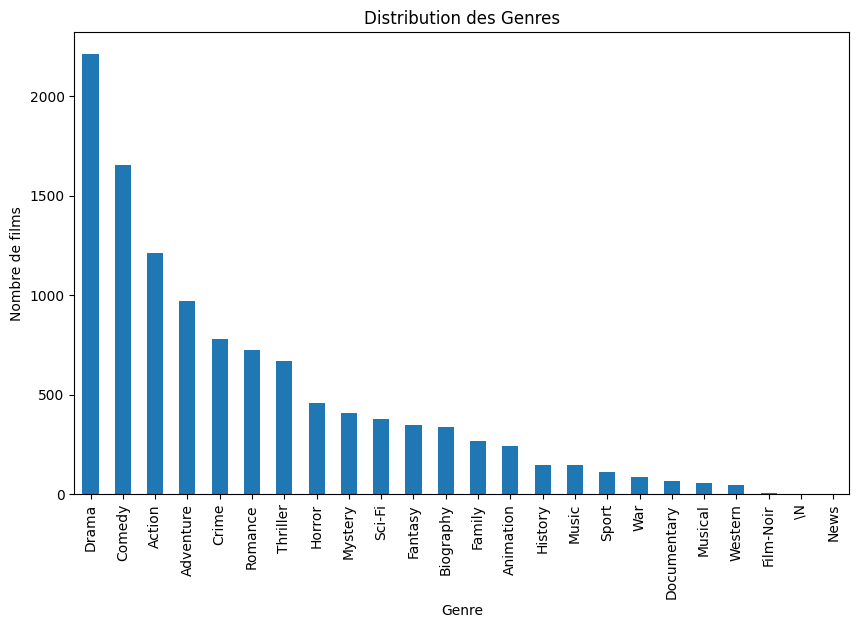

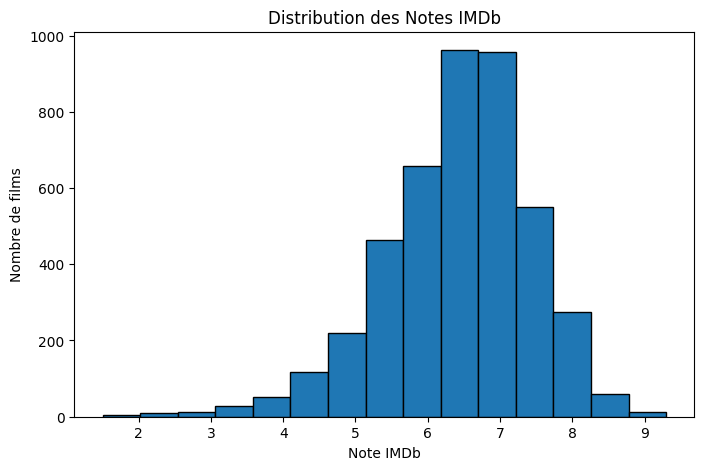

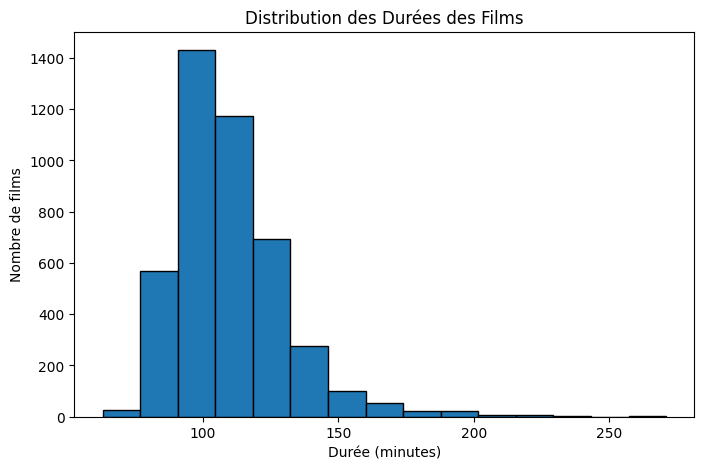

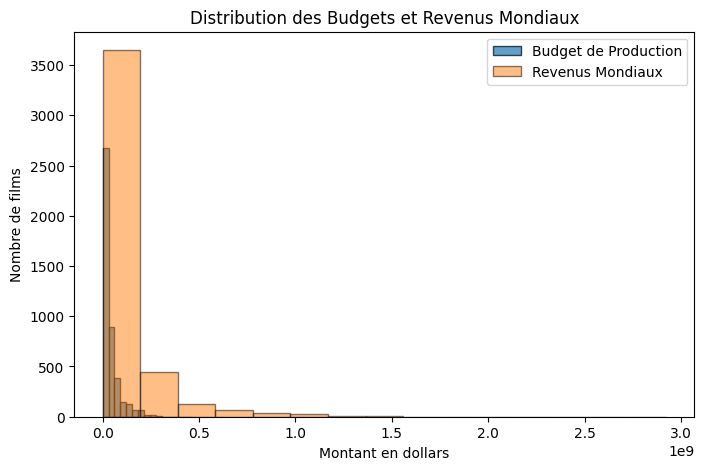

In [2]:
import matplotlib.pyplot as plt
# 1. Distribution des genres
genres_counts = movie_data_encoded.iloc[:, 14:].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
genres_counts.plot(kind='bar')
plt.title("Distribution des Genres")
plt.xlabel("Genre")
plt.ylabel("Nombre de films")
plt.show()

# 2. Distribution des notes IMDb
plt.figure(figsize=(8, 5))
plt.hist(movie_data_encoded['movie_averageRating'].dropna(), bins=15, edgecolor='black')
plt.title("Distribution des Notes IMDb")
plt.xlabel("Note IMDb")
plt.ylabel("Nombre de films")
plt.show()

# 3. Distribution des durées de films
plt.figure(figsize=(8, 5))
plt.hist(movie_data_encoded['runtime_minutes'].dropna(), bins=15, edgecolor='black')
plt.title("Distribution des Durées des Films")
plt.xlabel("Durée (minutes)")
plt.ylabel("Nombre de films")
plt.show()

# 4. Distribution des budgets et des revenus mondiaux
plt.figure(figsize=(8, 5))
plt.hist(movie_data_encoded['Production budget $'].dropna(), bins=15, edgecolor='black', alpha=0.7, label="Budget de Production")
plt.hist(movie_data_encoded['Worldwide gross $'].dropna(), bins=15, edgecolor='black', alpha=0.5, label="Revenus Mondiaux")
plt.title("Distribution des Budgets et Revenus Mondiaux")
plt.xlabel("Montant en dollars")
plt.ylabel("Nombre de films")
plt.legend()
plt.show()

In [3]:
#### matrice

from sklearn.metrics.pairwise import cosine_similarity

# Sélection des colonnes pour la similarité (toutes les colonnes numériques et encodées après le prétraitement)
# Exclure les colonnes non numériques comme 'movie_title' et 'production_date'
similarity_features = movie_data_encoded.drop(columns=['movie_title', 'production_date', 'genres', 'director_name',
                                                       'director_professions', 'director_birthYear', 'director_deathYear'])

# Calcul de la matrice de similarité cosinus
similarity_matrix = cosine_similarity(similarity_features)

# Afficher un aperçu de la matrice de similarité
similarity_matrix[:5, :5]  # Montrer les premières lignes et colonnes pour un aperçu rapide



array([[1.        , 0.99835003, 0.98752158, 0.99822394, 0.99799049],
       [0.99835003, 1.        , 0.97697948, 0.99402981, 0.99975995],
       [0.98752158, 0.97697948, 1.        , 0.99159543, 0.97572284],
       [0.99822394, 0.99402981, 0.99159543, 1.        , 0.99444632],
       [0.99799049, 0.99975995, 0.97572284, 0.99444632, 1.        ]])

In [5]:
import numpy as np

# Fonction pour générer des recommandations
def get_recommendations(movie_title, movie_data, similarity_matrix, top_n=5):
    # Trouver l'index du film sélectionné
    try:
        movie_idx = movie_data[movie_data['movie_title'] == movie_title].index[0]
    except IndexError:
        return f"Le film '{movie_title}' n'existe pas dans le dataset."
    
    # Récupérer les scores de similarité pour le film sélectionné
    similarity_scores = list(enumerate(similarity_matrix[movie_idx]))
    
    # Trier les films par similarité en ordre décroissant
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Sélectionner les 'top_n' films les plus similaires (en ignorant le premier qui est le film lui-même)
    top_similar_movies = similarity_scores[1:top_n+1]
    
    # Extraire les titres des films similaires
    recommended_movies = [movie_data['movie_title'].iloc[i[0]] for i in top_similar_movies]
    
    return recommended_movies

# Exemple d'utilisation : Recommander des films similaires à un titre spécifique
film_reference = "Avengers: Endgame"
recommendations = get_recommendations(film_reference, movie_data_encoded, similarity_matrix)

recommendations


['Fifty Shades Darker',
 'Skyline',
 'Aquaman',
 'Touching the Void',
 'Harry Potter and the Order of the Phoenix']